# Genome-scale metabolic models

## Preparation

In [1]:
from cobra.io import read_sbml_model

In [2]:
model = read_sbml_model('data/iJO1366.xml.gz')

## What is in a genome-scale metabolic model? (10 + 5)

In [3]:
model

Name,iJO1366
Memory address,1e4e38b2a10
Number of metabolites,1805
Number of reactions,2583
Number of genes,1367
Number of groups,36
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [ ]:
model.metabolites[0:10]
# printed [0, (inc) 9]

[<Metabolite 10fthf_c at 0x19801bf1510>,
 <Metabolite 12dgr120_c at 0x19801bf1570>,
 <Metabolite 12dgr140_c at 0x19801bf15a0>,
 <Metabolite 12dgr141_c at 0x19801bf1690>,
 <Metabolite 12dgr160_c at 0x19801bf1750>,
 <Metabolite 12dgr161_c at 0x19801bf16f0>,
 <Metabolite 12dgr180_c at 0x19801bf15d0>,
 <Metabolite 12dgr181_c at 0x19801bf16c0>,
 <Metabolite 12ppd__R_c at 0x19801bf1780>,
 <Metabolite 12ppd__S_c at 0x19801bf17b0>]

There are 1805 metabolites in the model.

In [4]:
len(model.metabolites)

1805

One can access a specific metabolite using dot notation.

In [ ]:
model.metabolites.g3p_c
# model.metabolites.g6p_c

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x19801c64bb0
Formula,C3H5O6P
Compartment,c
In 14 reaction(s),"TRPS3, TPI, GAPD, TALA, EDA, TGBPA, TKT2, DXPS, F6PA, TRPS1, TKT1, DRPA, FBA, DDPGALA"


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [ ]:
# the line below results in an error, uncomment to try
# model.metabolites.10fthf_c


#  File "<ipython-input-5-2772b042e9ed>", line 1
#     model.metabolites.10fthf_c
#                        ^
# SyntaxError: invalid syntax

# use get_by_id when model.metabolites doesn't work if the name doesn't directly match with the proper
# Python variable name

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [8]:
model.metabolites.get_by_id('10fthf_c')

Metabolite identifier,10fthf_c
Name,10-Formyltetrahydrofolate
Memory address,0x07f608bbae358
Formula,C20H21N7O7
Compartment,c
In 9 reaction(s),"BIOMASS_Ec_iJO1366_WT_53p95M, FMETTRS, AICART, FTHFD, MTHFC, FTHFLi, GARFT, ULA4NFT, BIOMASS_Ec_iJO1366_core_53p95M"


In [ ]:
# EXTRA COMMENTS: 
# Metabolites are associated with compartments in the cell. 
# Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` 
# 'c' => (Cytosol) compartment.

In [ ]:
model.metabolites.g3p_c.compartment
# reveals the compartment which contains this metabolite

'c'

The _E. coli_ model has three compartments.

In [11]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [4]:
model.metabolites.glc__D_c.compartment

'c'

In [5]:
model.metabolites.glc__D_p.compartment

'p'

The full name of the metabolite is available via the `.name` attribute. 

In [13]:
model.metabolites.glc__D_c.name

'D-Glucose'

One can look up the molecular formula of glucose.

In [14]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The `.elements` attribute returns a dictionary representation of the formula.

In [15]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [16]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [17]:
model.metabolites.g3p_c.annotation

{'SBO': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:12983',
  'CHEBI:12984',
  'CHEBI:14333',
  'CHEBI:17138',
  'CHEBI:181',
  'CHEBI:18324',
  'CHEBI:21026',
  'CHEBI:29052',
  'CHEBI:5446',
  'CHEBI:58027',
  'CHEBI:59776'],
 'hmdb': 'HMDB01112',
 'kegg.compound': ['C00118', 'C00661'],
 'metanetx.chemical': 'MNXM2378',
 'reactome': '29578',
 'seed.compound': 'cpd00102',
 'unipathway.compound': ['UPC00118', 'UPC00661']}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate in reactions as substrates and products.

In [18]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction F6PA at 0x7f608b51d828>,
           <Reaction TKT2 at 0x7f608b25f630>,
           <Reaction EDA at 0x7f608b4eb240>,
           <Reaction TALA at 0x7f608b2c9e48>,
           <Reaction DRPA at 0x7f608b52f860>,
           <Reaction DXPS at 0x7f608b501470>,
           <Reaction TPI at 0x7f608b278a58>,
           <Reaction TRPS1 at 0x7f608b2f8860>,
           <Reaction TGBPA at 0x7f608b2f44e0>,
           <Reaction GAPD at 0x7f608b558ef0>,
           <Reaction TKT1 at 0x7f608b25f0f0>,
           <Reaction DDPGALA at 0x7f608b5cb940>,
           <Reaction FBA at 0x7f608b519978>,
           <Reaction TRPS3 at 0x7f608b2f8be0>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [19]:
model.reactions[0:10]

[<Reaction DM_4crsol_c at 0x7f608b684be0>,
 <Reaction DM_5drib_c at 0x7f608b684da0>,
 <Reaction DM_aacald_c at 0x7f608b684dd8>,
 <Reaction DM_amob_c at 0x7f608b684f98>,
 <Reaction DM_mththf_c at 0x7f608b684fd0>,
 <Reaction DM_oxam_c at 0x7f608b6891d0>,
 <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x7f608b689208>,
 <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x7f608b6893c8>,
 <Reaction EX_12ppd__R_e at 0x7f608b6895f8>,
 <Reaction EX_12ppd__S_e at 0x7f608b689cf8>]

There are 2583 reactions in the model.

In [20]:
len(model.reactions)

2583

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [12]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction, reaction.name)

TRPS3: 3ig3p_c --> g3p_c + indole_c Tryptophan synthase (indoleglycerol phosphate)
TPI: dhap_c <=> g3p_c Triose-phosphate isomerase
GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
EDA: 2ddg6p_c --> g3p_c + pyr_c 2-dehydro-3-deoxy-phosphogluconate aldolase
TGBPA: tagdp__D_c <=> dhap_c + g3p_c Tagatose-bisphosphate aldolase
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transketolase
DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c 1-deoxy-D-xylulose 5-phosphate synthase
F6PA: f6p_c <=> dha_c + g3p_c Fructose 6-phosphate aldolase
TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c Tryptophan synthase (indoleglycerol phosphate)
TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase
DRPA: 2dr5p_c --> acald_c + g3p_c Deoxyribose-phosphate aldolase
FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase
DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c 2-dehydro-3-deoxy-6-phosphogalactonate aldolase


The second reaction in this list is Glyceraldehyde-3-phosphate dehydrogenase (GAPD).

In [22]:
model.reactions.GAPD.name

'Glyceraldehyde-3-phosphate dehydrogenase'

A reaction has a flux expression, which in cobrapy is coded as the forward flux + the reverse flux (a convenient way to represent the mathematical problem).

In [23]:
model.reactions.GAPD.flux_expression

1.0*GAPD - 1.0*GAPD_reverse_459c1

### Genes and gene-protein-reaction associations

The model also contains genes (perhaps more appropriately gene products) and they belong to reactions.

In [24]:
model.genes[0:5]

[<Gene b2215 at 0x7f608b7fe3c8>,
 <Gene b1377 at 0x7f608b7fe6a0>,
 <Gene b0241 at 0x7f608b7fe710>,
 <Gene b0929 at 0x7f608b7fe780>,
 <Gene b4035 at 0x7f608b7fe7f0>]

In [25]:
model.genes.b1779.reactions

frozenset({<Reaction E4PD at 0x7f608b501748>,
           <Reaction GAPD at 0x7f608b558ef0>})

The gapA (b1779) gene is the only one associated to reaction glyceraldehyde-3-phosphate dehydrogenase.

In [26]:
model.reactions.GAPD.gene_reaction_rule

'b1779'

Phosphofructokinase (PFK) on the other hand seems to be associated with to isozymes.

In [27]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [ ]:
model.reactions.PFK.gene_name_reaction_rule


'pfkA or pfkB'

Reactions are functional if all genes are functional

In [13]:
model.reactions.PFK

Reaction identifier,PFK
Name,Phosphofructokinase
Memory address,0x1980e2dbd90
Stoichiometry,"atp_c + f6p_c --> adp_c + fdp_c + h_c ATP + D-Fructose 6-phosphate --> ADP + D-Fructose 1,6-bisphosphate + H+"
GPR,b3916 or b1723
Lower bound,0.0
Upper bound,1000.0


In [ ]:
print(model.genes.b3916.functional, model.genes.b1723.functional, model.reactions.PFK.functional)
# model.genes.b3916.functional tells you if that gene is functional here
# model.reactions.PFK.functional tells you if a rxn is occuring

True True True


If we knock out one of the isozymes, the PFK reaction stays functional, but not if we knock both.

In [31]:
model_copy = model.copy()
model_copy.genes.b3916.knock_out()
print(model_copy.reactions.PFK.functional)

model_copy = model.copy()
model_copy.genes.b3916.knock_out()
model_copy.genes.b1723.knock_out()
print(model_copy.reactions.PFK.functional)

True
False


### Objective

In the iJO1366 model, the default objective is to maximize the flux through the biomass reaction (i.e. growth). 

In [32]:
print(model.objective)

Maximize
-1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 1.0*BIOMASS_Ec_iJO1366_core_53p95M


### Querying

One can use `.query('search term', 'attribute_to_search_in')` to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term _glucose_ in their name.

In [33]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

6-Acetyl-D-glucose
ADPglucose
DTDP-4-dehydro-6-deoxy-D-glucose
DTDPglucose
UDPglucose
UDPglucose
UDPglucose


### Exercises

In [21]:
# which reactions includes cytosolic atp?
model.metabolites.atp_c
model.metabolites.atp_c.reactions

frozenset({<Reaction 14GLUCANabcpp at 0x1980e217820>,
           <Reaction 2AGPEAT120 at 0x1980e268b50>,
           <Reaction 2AGPEAT140 at 0x1980e268dc0>,
           <Reaction 2AGPEAT141 at 0x1980e269030>,
           <Reaction 2AGPEAT160 at 0x1980e2694e0>,
           <Reaction 2AGPEAT161 at 0x1980e269990>,
           <Reaction 2AGPEAT180 at 0x1980e269e40>,
           <Reaction 2AGPEAT181 at 0x1980e26a2f0>,
           <Reaction 2AGPGAT120 at 0x1980e26bd30>,
           <Reaction 2AGPGAT140 at 0x1980e26bfa0>,
           <Reaction 2AGPGAT141 at 0x1980e26a710>,
           <Reaction 2AGPGAT160 at 0x1980e26abc0>,
           <Reaction 2AGPGAT161 at 0x1980e294bb0>,
           <Reaction 2AGPGAT180 at 0x1980e295060>,
           <Reaction 2AGPGAT181 at 0x1980e295510>,
           <Reaction 3KGK at 0x1980e2bb970>,
           <Reaction 3PEPTabcpp at 0x1980e0dc2b0>,
           <Reaction 4PEPTabcpp at 0x1980e18bb50>,
           <Reaction AACPS1 at 0x1980e15e0e0>,
           <Reaction AACPS2 at 0x1980e

Convert the cells below to code and fill in the blanks

In [25]:
# which metabolite is named adenosine
model.metabolites.query('adenosine', 'name')
# for metabolite in model.metabolites.query('glucose', 'name'):
#     print(metabolite.name)

[<Metabolite 5mta_c at 0x19801bf3970>,
 <Metabolite dad_2_c at 0x19801c66140>,
 <Metabolite dad_5_c at 0x19801c66110>,
 <Metabolite dad_2_e at 0x19801e66b00>,
 <Metabolite dad_2_p at 0x1980dd07310>]

In [ ]:
# which genes are necessary for PFK reaction?
# Blattner 4-digit codes
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

In [ ]:
# Genes Names
odel.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

## Simulating models with regular flux balance analysis (FBA) (5 + 5)

In [34]:
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,2.1907e-04,0.0000
DM_5drib_c,2.2103e-04,0.0000
DM_aacald_c,0.0000e+00,0.0000
DM_amob_c,1.9647e-06,0.0000
DM_mththf_c,4.4010e-04,0.0000
...,...,...
ZN2abcpp,0.0000e+00,-0.0083
ZN2t3pp,0.0000e+00,-0.0021
ZN2tpp,3.3499e-04,0.0000
ZNabcpp,0.0000e+00,-0.0083


Sometimes a solution cannot be found. For example, setting the lower bound of the objective function to a very high value that the model cannot achieve will trigger a warning when trying to optimize the model. Parameters reported from an infeasible model are not meaningful to interpret (except in rare occasions when you may want to figure out why a model is infeasible).

In [35]:
infeasible_model = model.copy()
infeasible_model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.lower_bound = 100000
infeasible_model.optimize()

cobra/util/solver.py:419 UserWarning: solver status is 'infeasible'


<Solution infeasible at 0x7f608d20ac18>

Mathematical solvers are now so fast that for computing the solution can be even faster than it takes to collect the values from the solver. If we are only interested in the flux value of a single reaction or the objective, it is faster to use `model.slim_optimize` which only does the optimization and returnsm the objective value leaving it up to you to fetch other values that you may need. For example, let's optimize and get the flux value of the `ATPM` reaction.

In [36]:
%%time
solution = model.optimize()
solution.fluxes['ATPM']

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 19.3 ms


In [37]:
%%time
model.slim_optimize()
model.reactions.ATPM.flux

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.72 ms


### Exercises

Convert the cell below to code and fill in the blanks.

Optimize for acetate production at minimum 0.1 $h^{-1}$ growth rate

## The math (5)

### The mathematical problem

We can calculate fluxes using our model by formulating it as a mathematical problem. There, fluxes through reactions become variables and metabolites become constraints. By deciding that fluxes in and out of the system must add up to zero, we can then compute possible flux values for all reactions (if the model is feasible). We can inspect the whole equation by:

In [38]:
print(str(model.solver)[0:1550])

\* Problem: Unknown *\

Maximize
 obj: + BIOMASS_Ec_iJO1366_core_53p95M
 - BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1

Subject To
 r_1: + FMETTRS_reverse_3b6c6 + FTHFD_reverse_44321
 - MTHFC_reverse_f6fcc
 + 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M_reverse_06c4a
 + AICART_reverse_b7b59 - 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M - FTHFD
 + 0.000223 BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 - FMETTRS
 + GARFT_reverse_7ecb6 - 0.000223 BIOMASS_Ec_iJO1366_core_53p95M - GARFT
 + FTHFLi - FTHFLi_reverse_a6dc7 + ULA4NFT_reverse_07217 - AICART
 - ULA4NFT + MTHFC = 0
 r_2: + PAPA120 + x_665 - PAPA120_reverse_75d70 - x_666 - DAGK120
 + DAGK120_reverse_7cd00 = 0
 r_3: - PAPA140_reverse_255f5 - DAGK140 + DAGK140_reverse_87f8f
 + PAPA140 - x_668 + x_667 = 0
 r_4: - x_670 + PAPA141 + x_669 - PAPA141_reverse_945ab
 + DAGK141_reverse_f6e5f - DAGK141 = 0
 r_5: - DAGK160 + DAGK160_reverse_0238d + x_671 + PAPA160 - x_672
 - PAPA160_reverse_c64df = 0
 r_6: - PAPA161_reverse_1bc33 + DAGK161_reverse_9bfe7 + P

Mostly, we luckily do not have to care much about this as cobrapy will use optlang and dedicated mathematical solvers to do the hard work for us, but it can be good know about the separation between the metabolic model and the mathematical problem.

In [39]:
len(model.variables)

5166

In [40]:
len(model.constraints)

1805

### The stoichiometric matrix S

In [41]:
from cobra.util import create_stoichiometric_matrix

In [42]:
stoich_matrix = create_stoichiometric_matrix(model)
stoich_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1., -1.,  1.]])

This is how the the stoichiometry matrix S looks like when visualized as a matrix plot.

In [43]:
%matplotlib inline

In [44]:
import matplotlib.pyplot as plt

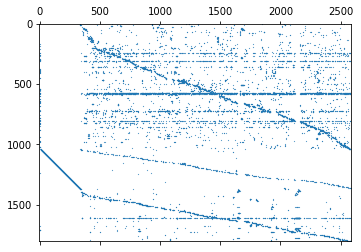

In [45]:
plt.spy(stoich_matrix, precision=0.01, markersize=.2)

<div class="alert alert-info">

**Question:** What are the diagonal and horizontal lines?
</div>
